In [56]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np


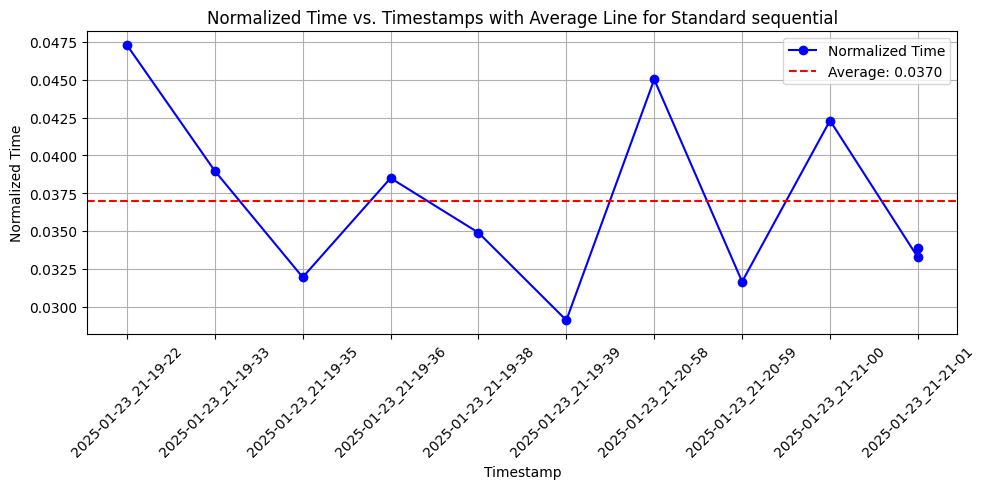

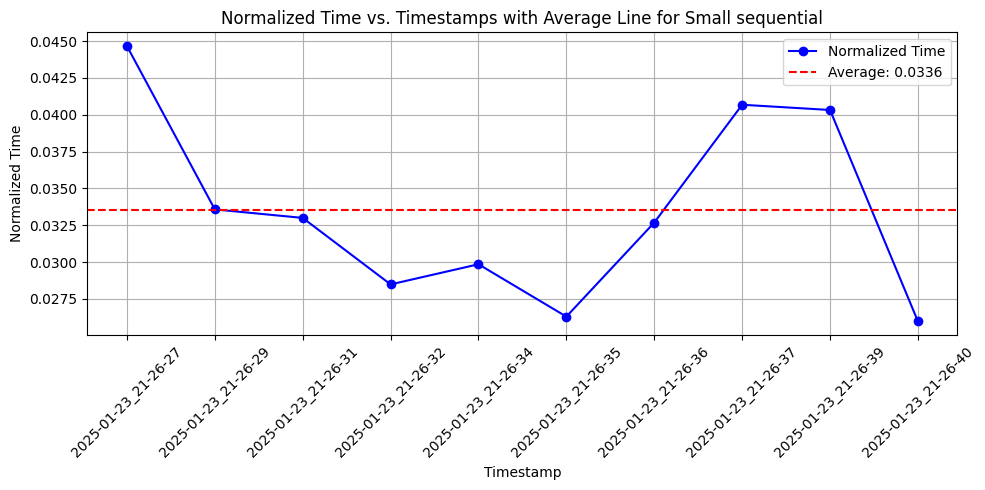

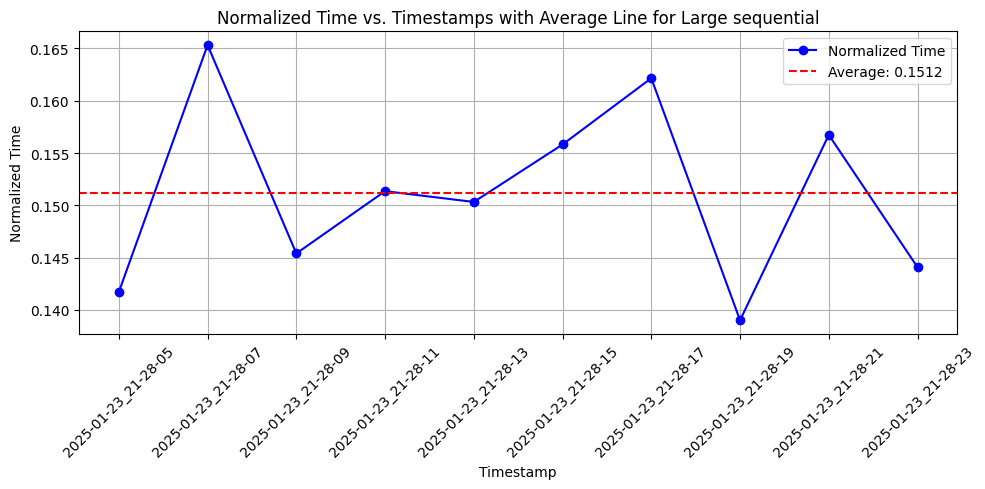

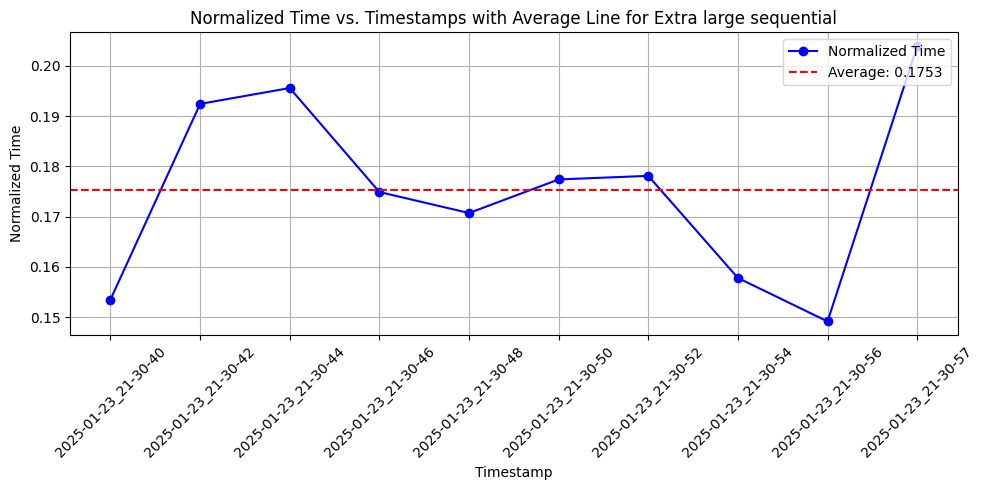

In [57]:
# List of files to compare
files = [
    "report/sequential-benchmarking-reports/standard_sequential.json", 
    "report/sequential-benchmarking-reports/small_sequential.json", 
    "report/sequential-benchmarking-reports/large_sequential.json",
    "report/sequential-benchmarking-reports/extra_large_sequential.json"
]


# load the data and calculate the average
def load_data_and_create_plot(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    # Extract timestamps and normalized times
    timestamps = [list(item.keys())[0].split('=')[1] for item in data]
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # Calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)

    # Create plot
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, normalized_times, marker='o', linestyle='-', color='b', label="Normalized Time")
    plt.axhline(y=avg_normalized_time, color='r', linestyle='--', label=f"Average: {avg_normalized_time:.4f}")
    plt.xticks(rotation=45)
    plt.title(f"Normalized Time vs. Timestamps with Average Line for {os.path.basename(filename).split('.')[0].replace('_', ' ').capitalize()}")
    plt.xlabel("Timestamp")
    plt.ylabel("Normalized Time")
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.tight_layout()

    # Show the plot
    plt.show()
    # plot_filename = f"{os.path.basename(filename).split('.')[0]}_plot.png"
    # plt.savefig(plot_filename)
    plt.close()

# Loop through each file and create the plot
for file in files:
    load_data_and_create_plot(file)


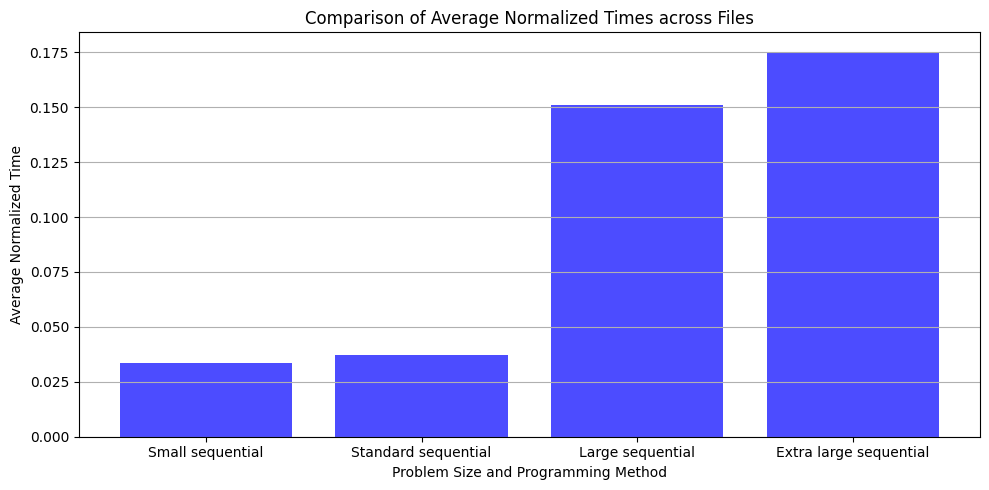

In [58]:
# load the data from a file and calculate the average
def load_data_and_calculate_avg(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # Extract normalized times
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # Calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)
    return avg_normalized_time


# List of files to compare
files = [
    "report/sequential-benchmarking-reports/small_sequential.json", 
    "report/sequential-benchmarking-reports/standard_sequential.json", 
    "report/sequential-benchmarking-reports/large_sequential.json",
    "report/sequential-benchmarking-reports/extra_large_sequential.json"
] 

# Extract averages and filenames
averages = []
file_names = []

for file in files:
    avg = load_data_and_calculate_avg(file)
    averages.append(avg)
    file_names.append(os.path.basename(file).split('.')[0].replace('_', ' ').capitalize())  # Get just the file name

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(file_names, averages, color='b', alpha=0.7)
plt.xlabel("Problem Size and Programming Method")
plt.ylabel("Average Normalized Time")
plt.title("Comparison of Average Normalized Times across Files")
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()
